# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [45]:
!conda env list

# conda environments:
#
base                     C:\Users\sgoodel3\Anaconda3
PythonData            *  C:\Users\sgoodel3\Anaconda3\envs\PythonData



In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [47]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    #print(lat_lng)
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #print(city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [48]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
url = base_url + weather_key

# create city list
city_data = []

#Perform weather check on each city usa a series of successive API calls.

print("Beginning Data Retrieval")
print("-----------------------------")

record_count = 1
set_count = 1

for index, city in enumerate(cities):
    if (index%50==0 and index>=50):
        record_count = 1 
        set_count = set_count + 1
        #stores the city for retrieval this needs to be inside the loop  
    query_url = url + "&q=" + city
    print("Processing Record %s of %s | %s" % (record_count, set_count, city))
    record_count = record_count + 1
    
    try:
        city_weather = requests.get(query_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass 
        
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")      


Beginning Data Retrieval
-----------------------------
Processing Record 1 of 1 | banjar
Processing Record 2 of 1 | rikitea
Processing Record 3 of 1 | ormara
Processing Record 4 of 1 | itarema
Processing Record 5 of 1 | yulara
Processing Record 6 of 1 | jamestown
Processing Record 7 of 1 | dingle
Processing Record 8 of 1 | tumannyy
City not found. Skipping...
Processing Record 9 of 1 | alice town
Processing Record 10 of 1 | mataura
Processing Record 11 of 1 | kapaa
Processing Record 12 of 1 | vardo
Processing Record 13 of 1 | kodiak
Processing Record 14 of 1 | hobart
Processing Record 15 of 1 | faanui
Processing Record 16 of 1 | ushuaia
Processing Record 17 of 1 | flin flon
Processing Record 18 of 1 | longyearbyen
Processing Record 19 of 1 | barentsburg
City not found. Skipping...
Processing Record 20 of 1 | mount isa
Processing Record 21 of 1 | albany
Processing Record 22 of 1 | georgetown
Processing Record 23 of 1 | pevek
Processing Record 24 of 1 | merauke
Processing Record 25 of 1 

Processing Record 7 of 5 | nikolskoye
Processing Record 8 of 5 | shemonaikha
Processing Record 9 of 5 | salinopolis
Processing Record 10 of 5 | vanimo
Processing Record 11 of 5 | saleaula
City not found. Skipping...
Processing Record 12 of 5 | galich
Processing Record 13 of 5 | sattahip
Processing Record 14 of 5 | khatanga
Processing Record 15 of 5 | vestmanna
Processing Record 16 of 5 | baykit
Processing Record 17 of 5 | cherskiy
Processing Record 18 of 5 | senneterre
Processing Record 19 of 5 | paamiut
Processing Record 20 of 5 | rawson
Processing Record 21 of 5 | olga
Processing Record 22 of 5 | saint-georges
Processing Record 23 of 5 | galveston
Processing Record 24 of 5 | ketchikan
Processing Record 25 of 5 | nuevitas
Processing Record 26 of 5 | semiletka
Processing Record 27 of 5 | hithadhoo
Processing Record 28 of 5 | banff
Processing Record 29 of 5 | sedelnikovo
City not found. Skipping...
Processing Record 30 of 5 | karaul
City not found. Skipping...
Processing Record 31 of 5 

Processing Record 13 of 9 | chinhoyi
Processing Record 14 of 9 | sovetskiy
Processing Record 15 of 9 | azimur
City not found. Skipping...
Processing Record 16 of 9 | mwinilunga
Processing Record 17 of 9 | ancud
Processing Record 18 of 9 | marcona
City not found. Skipping...
Processing Record 19 of 9 | andros town
Processing Record 20 of 9 | hami
Processing Record 21 of 9 | grafton
Processing Record 22 of 9 | vestmannaeyjar
Processing Record 23 of 9 | darasun
Processing Record 24 of 9 | tilichiki
Processing Record 25 of 9 | tiznit
Processing Record 26 of 9 | fort nelson
Processing Record 27 of 9 | lavrentiya
Processing Record 28 of 9 | ierapetra
Processing Record 29 of 9 | indija
Processing Record 30 of 9 | eldikan
City not found. Skipping...
Processing Record 31 of 9 | kariba
Processing Record 32 of 9 | hammerfest
Processing Record 33 of 9 | gorno-chuyskiy
City not found. Skipping...
Processing Record 34 of 9 | nioro
Processing Record 35 of 9 | vaitupu
City not found. Skipping...
Proce

In [49]:
city_weather

{'coord': {'lon': 128.7333, 'lat': -15.7667},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 93.2,
  'feels_like': 100.69,
  'temp_min': 93.2,
  'temp_max': 93.2,
  'pressure': 1002,
  'humidity': 59},
 'visibility': 10000,
 'wind': {'speed': 6.91, 'deg': 250},
 'clouds': {'all': 40},
 'dt': 1612587794,
 'sys': {'type': 1,
  'id': 9587,
  'country': 'AU',
  'sunrise': 1612559843,
  'sunset': 1612605654},
 'timezone': 28800,
 'id': 2068110,
 'name': 'Kununurra',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [65]:
# Convert Raw Data to DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,banjar,-8.1900,114.9675,82.40,83,20,3.44,ID,1612587579
1,rikitea,-23.1203,-134.9692,78.15,71,52,13.94,PF,1612587580
2,ormara,25.2088,64.6357,68.18,38,0,2.89,PK,1612587580
3,itarema,-2.9248,-39.9167,78.98,78,46,11.14,BR,1612587571
4,yulara,-25.2406,130.9889,86.00,21,62,10.36,AU,1612587575
...,...,...,...,...,...,...,...,...,...
552,san quintin,30.4833,-115.9500,57.11,81,0,8.79,MX,1612587571
553,cruz grande,16.7333,-99.1333,71.60,84,30,2.91,MX,1612587793
554,dunedin,-45.8742,170.5036,60.01,78,14,23.00,NZ,1612587536
555,chumikan,54.7183,135.3150,-5.87,86,100,11.68,RU,1612587794


In [66]:
# city_data_df.to_csv("city_data.csv")
len(city_data_df)

557

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [67]:
print(city_data_df['City'].where(city_data_df['Humidity'] > 100))

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
552    NaN
553    NaN
554    NaN
555    NaN
556    NaN
Name: City, Length: 557, dtype: object


In [68]:
#  Get the indices of cities that have humidity over 100%.
city_data_df.agg({'Humidity':['mean', 'median', 'var', 'std', 'max', 'min']})

,Humidity
mean,74.921005
median,79.000000
var,348.731159
std,18.674345
max,100.000000
min,15.000000


In [70]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_data_df[~city_data_df["Humidity"] >100]



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [75]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data" 
city_data_df = city_data_df[~city_data_df["Humidity"] >100] 
clean_city_data = pd.DataFrame(city_data)
clean_city_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,banjar,-8.1900,114.9675,82.40,83,20,3.44,ID,1612587579
1,rikitea,-23.1203,-134.9692,78.15,71,52,13.94,PF,1612587580
2,ormara,25.2088,64.6357,68.18,38,0,2.89,PK,1612587580
3,itarema,-2.9248,-39.9167,78.98,78,46,11.14,BR,1612587571
4,yulara,-25.2406,130.9889,86.00,21,62,10.36,AU,1612587575
...,...,...,...,...,...,...,...,...,...
552,san quintin,30.4833,-115.9500,57.11,81,0,8.79,MX,1612587571
553,cruz grande,16.7333,-99.1333,71.60,84,30,2.91,MX,1612587793
554,dunedin,-45.8742,170.5036,60.01,78,14,23.00,NZ,1612587536
555,chumikan,54.7183,135.3150,-5.87,86,100,11.68,RU,1612587794


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

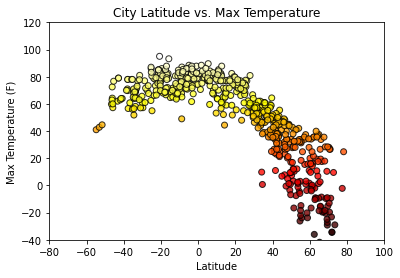

In [78]:
plt.scatter(clean_city_data["Lat"], 
            clean_city_data["Max Temp"], c=clean_city_data["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='hot', alpha=0.8, label="City")

plt.title('City Latitude vs. Max Temperature')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim([-80, 100])
plt.ylim([-40, 120])
plt.show()

## Latitude vs. Humidity Plot

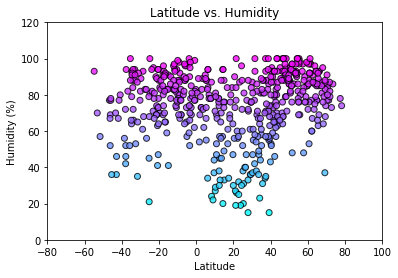

In [81]:
plt.scatter(clean_city_data["Lat"], 
            clean_city_data["Humidity"], c=clean_city_data["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='cool', alpha=0.8, label="City")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity')
plt.xlim([-80, 100])
plt.ylim([0, 120])
plt.show()

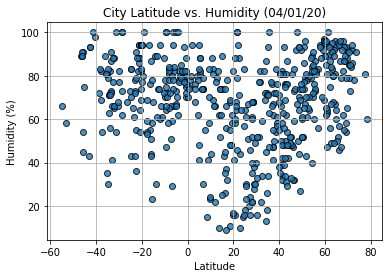

## Latitude vs. Cloudiness Plot

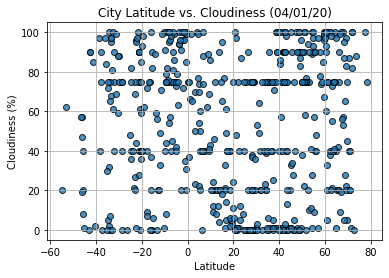

## Latitude vs. Wind Speed Plot

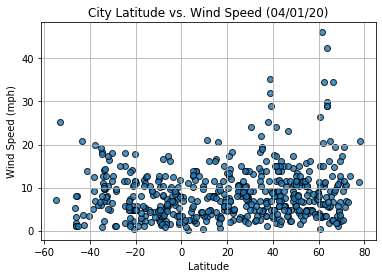

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


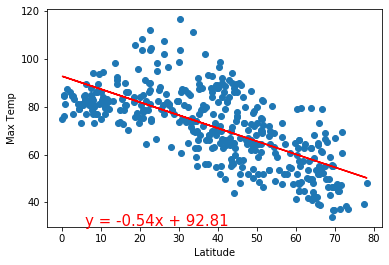

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


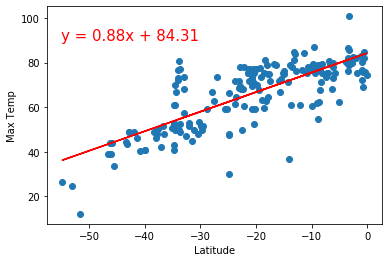

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


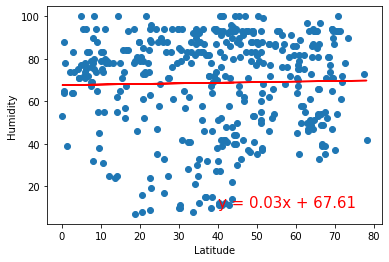

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


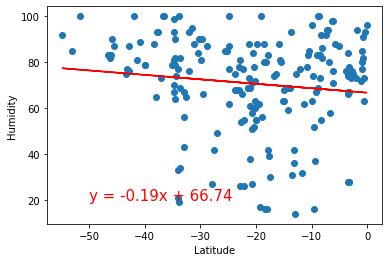

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


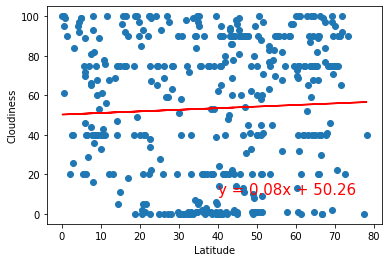

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


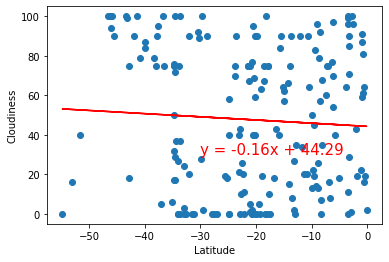

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


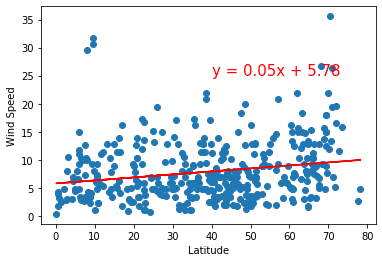

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


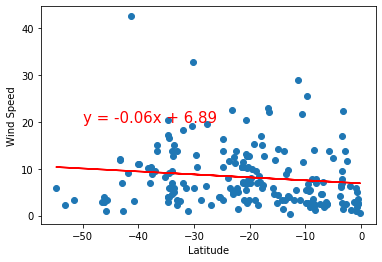